In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [2]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [3]:
open('yob2018.txt','r').readlines()[:10]

['Emma,F,18688\n',
 'Olivia,F,17921\n',
 'Ava,F,14924\n',
 'Isabella,F,14464\n',
 'Sophia,F,13928\n',
 'Charlotte,F,12940\n',
 'Mia,F,12642\n',
 'Amelia,F,12301\n',
 'Harper,F,10582\n',
 'Evelyn,F,10376\n']

In [4]:
names2018 = pd.read_csv('yob2018.txt')
names2018.head(20)

,Emma,F,18688
0,Olivia,F,17921
1,Ava,F,14924
2,Isabella,F,14464
3,Sophia,F,13928
4,Charlotte,F,12940
5,Mia,F,12642
6,Amelia,F,12301
7,Harper,F,10582
8,Evelyn,F,10376
9,Abigail,F,9796


In [5]:
names2018.tail(20)

,Emma,F,18688
32012,Zien,M,5
32013,Zier,M,5
32014,Zierre,M,5
32015,Zihir,M,5
32016,Zim,M,5
32017,Zin,M,5
32018,Zishe,M,5
32019,Zmari,M,5
32020,Zoel,M,5
32021,Zola,M,5


In [6]:
names_all = []

for year in range(1880, 2018+1):
    names_all.append(pd.read_csv('yob{}.txt'.format(year), names = ['name', 'sex','number']))
    names_all[-1]['year'] = year
                     
allyears = pd.concat(names_all)

In [7]:
allyears.head(20)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [8]:
allyears.tail(20)

,name,sex,number,year
32013,Zien,M,5,2018
32014,Zier,M,5,2018
32015,Zierre,M,5,2018
32016,Zihir,M,5,2018
32017,Zim,M,5,2018
32018,Zin,M,5,2018
32019,Zishe,M,5,2018
32020,Zmari,M,5,2018
32021,Zoel,M,5,2018
32022,Zola,M,5,2018


In [61]:
M_total = sum(allyears['sex'] == 'M')
F_total = sum(allyears['sex'] == 'F')
total = len(allyears)

print ('Total Number of Male in the dataset: ', M_total)
print ('Total Number of Female in the dataset: ', F_total)
print('Percentage of Male in the dataset: ', round((M_total*100/total),2),'%')
print('Percentage of Female in the dataset: ', round((F_total*100/total),2),'%')

Total Number of Male in the dataset:  800519
Total Number of Female in the dataset:  1156527
Percentage of Male in the dataset:  40.9 %
Percentage of Female in the dataset:  59.1 %


In [93]:
mtop = allyears[allyears['sex'] == 'M'].drop(columns = ['sex','year','rank']).groupby(['name']).sum().sort_values(by=['number'], ascending=False)
mtop10 = mtop.head(10)
print('Most Popular Male Name of All Time: ', '\n', mtop10)


ftop = allyears[allyears['sex'] == 'F'].drop(columns = ['sex','year','rank']).groupby(['name']).sum().sort_values(by=['number'], ascending=False)
ftop10 = ftop.head(10)
print('\n','Most Popular Female Name of All Time: ', '\n', ftop10)

Most Popular Male Name of All Time:  
           number
name            
James    5164280
John     5124817
Robert   4820129
Michael  4362731
William  4117369
David    3621322
Joseph   2613304
Richard  2565301
Charles  2392779
Thomas   2311849

 Most Popular Female Name of All Time:  
             number
name              
Mary       4125675
Elizabeth  1638349
Patricia   1572016
Jennifer   1467207
Linda      1452668
Barbara    1434397
Margaret   1248985
Susan      1121703
Dorothy    1107635
Sarah      1077746


In [9]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()
allyears_indexed.head(20)

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
              2016       7
    Aabidah   2018       5
    Aabriella 2008       5
              2014       5
              2015       5
              2016      11
              2017       6
              2018       6
    Aada      2015       5
              2018       8
    Aadaya    2018       8
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
              2015       8

In [10]:
allyears_indexed.loc['M','Nathan']

,number
year,
1880,114
1881,91
1882,113
1883,93
1884,100
1885,103
1886,136
1887,106
1888,129


In [11]:
def plotname(sex, name):
    data = allyears_indexed.loc[sex ,name]
    pp.plot(data.index, data.values)

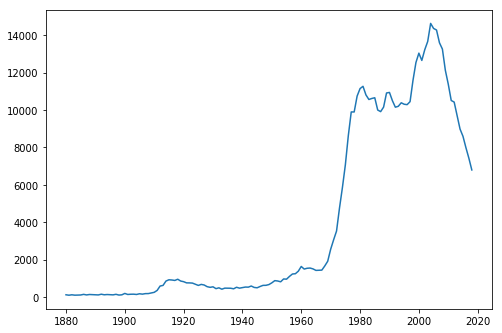

In [12]:
pp.figure(figsize = (8, 5.5))
plotname('M','Nathan')

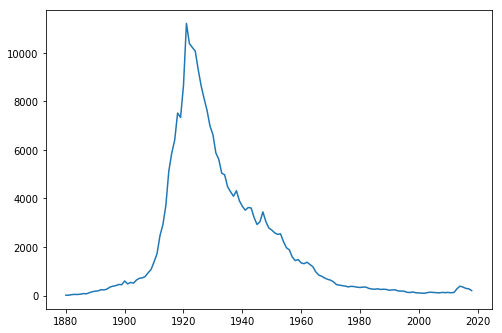

In [13]:
pp.figure(figsize = (8, 5.5))
plotname('F','Marjorie')

In [14]:
allyears_indexed.loc['F','Marjorie']

,number
year,
1880,16
1881,15
1882,40
1883,48
1884,45
1885,59
1886,83
1887,73
1888,118


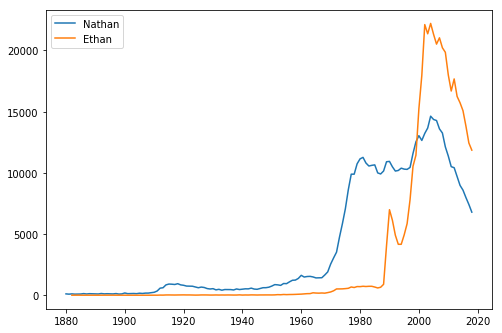

In [15]:
names = ['Nathan', 'Ethan']

pp.figure(figsize = (8, 5.5))

for name in names: 
    plotname('M', name)

pp.legend(names)

In [16]:
allyears_indexed.loc['M'].loc[names].unstack(level=0).fillna(0)

number         
name    Ethan   Nathan
year                  
1880      0.0    114.0
1881      0.0     91.0
1882      7.0    113.0
1883      0.0     93.0
1884     10.0    100.0
1885      0.0    103.0
1886      6.0    136.0
1887      7.0    106.0
1888      0.0    129.0
1889      0.0    121.0
1890      0.0    110.0
1891      6.0    106.0
1892      0.0    144.0
1893      9.0    114.0
1894      0.0    127.0
1895      0.0    119.0
1896      9.0    110.0
1897      0.0    139.0
1898      7.0     99.0
1899      0.0    112.0
1900      0.0    186.0
1901      6.0    131.0
1902      0.0    143.0
1903      0.0    146.0
1904      0.0    131.0
1905      0.0    168.0
1906      0.0    148.0
1907      0.0    176.0
1908      5.0    178.0
1909      6.0    209.0
...       ...      ...
1989   4055.0  10906.0
1990   6990.0  10935.0
1991   6127.0  10494.0
1992   4905.0  10146.0
1993   4163.0  10194.0
1994   4165.0  10382.0
1995   4931.0  10304.0
1996   5852.0  10283.0
1997   7806.0  10442.0
1998  10533.0  11584.0
1999  11443.0  12535.0
2000  15223.0  13037.0
2001  17962.0  12647.0
2002  22109.0  13220.0
2003  21357.0  13660.0
2004  22206.0  14627.0
2005  21312.0  14358.0
2006  20514.0  14274.0
2007  21029.0  13591.0
2008  20216.0  13254.0
2009  19847.0  12121.0
2010  18002.0  11373.0
2011  16684.0  10505.0
2012  17672.0  10420.0
2013  16241.0   9711.0
2014  15724.0   8976.0
2015  15077.0   8588.0
2016  13819.0   7981.0
2017  12439.0   7418.0
2018  11854.0   6790.0

[139 rows x 2 columns]

In [17]:
top2018 = allyears_indexed.loc['M',:,2018].sort_values('number',ascending =False)
top2018.head(20)

number
sex name      year        
M   Liam      2018   19837
    Noah      2018   18267
    William   2018   14516
    James     2018   13525
    Oliver    2018   13389
    Benjamin  2018   13381
    Elijah    2018   12886
    Lucas     2018   12585
    Mason     2018   12435
    Logan     2018   12352
    Alexander 2018   11989
    Ethan     2018   11854
    Jacob     2018   11770
    Michael   2018   11620
    Daniel    2018   11173
    Henry     2018   10649
    Jackson   2018   10323
    Sebastian 2018   10054
    Aiden     2018    9979
    Matthew   2018    9924

In [18]:
top2018.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Liam
1,Noah
2,William
3,James
4,Oliver


In [19]:
def topten(sex, year):
    simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending =False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [20]:
topten('M', 2018)

,2018
1,Liam
2,Noah
3,William
4,James
5,Oliver
6,Benjamin
7,Elijah
8,Lucas
9,Mason
10,Logan


In [21]:
topten('F', 2018)

,2018
1,Emma
2,Olivia
3,Ava
4,Isabella
5,Sophia
6,Charlotte
7,Mia
8,Amelia
9,Harper
10,Evelyn


In [22]:
def toptens(sex, year0, year1):
    years = [topten(sex, year) for year in range(year0, year1 + 1)]
    
    return years[0].join(years[1:])

In [23]:
toptens('M', 2010, 2018)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
2,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
3,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
4,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
5,William,Noah,William,William,William,William,James,Logan,Oliver
6,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
7,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
8,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
9,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
10,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [24]:
toptens('F', 2010, 2018)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
2,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
3,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
4,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
5,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
6,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
7,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
8,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
9,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
10,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [25]:
# Analyze the trend for "Nathan" & "Ethan" after 1985
# Mission: Impossible release year is in 1996

In [26]:
allyears1985 = allyears[allyears.year > 1984]
allyears1985.head(20)

,name,sex,number,year
0,Jessica,F,48347,1985
1,Ashley,F,47007,1985
2,Jennifer,F,42651,1985
3,Amanda,F,39052,1985
4,Sarah,F,24882,1985
5,Stephanie,F,23239,1985
6,Nicole,F,22967,1985
7,Heather,F,21153,1985
8,Elizabeth,F,20541,1985
9,Megan,F,20013,1985


In [27]:
allyears1985.tail(20)

,name,sex,number,year
32013,Zien,M,5,2018
32014,Zier,M,5,2018
32015,Zierre,M,5,2018
32016,Zihir,M,5,2018
32017,Zim,M,5,2018
32018,Zin,M,5,2018
32019,Zishe,M,5,2018
32020,Zmari,M,5,2018
32021,Zoel,M,5,2018
32022,Zola,M,5,2018


In [28]:
allyears1985_indexed = allyears1985.set_index(['sex','name','year']).sort_index()
allyears1985_indexed.head(20)

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
              2016       7
    Aabidah   2018       5
    Aabriella 2008       5
              2014       5
              2015       5
              2016      11
              2017       6
              2018       6
    Aada      2015       5
              2018       8
    Aadaya    2018       8
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
              2015       8

In [29]:
def plotname1985(sex, name):
    data = allyears1985_indexed.loc[sex ,name]
    pp.plot(data.index, data.values)

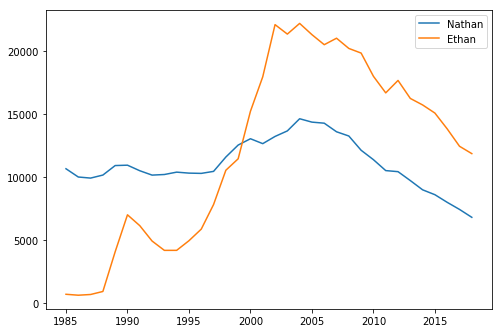

In [30]:
names = ['Nathan', 'Ethan']

pp.figure(figsize = (8, 5.5))

for name in names: 
    plotname1985('M', name)

pp.legend(names)

In [31]:
allyears1985_indexed.loc['M'].loc[names].unstack(level=0).fillna(0)

number       
name  Ethan Nathan
year              
1985    672  10651
1986    598   9995
1987    655   9909
1988    895  10150
1989   4055  10906
1990   6990  10935
1991   6127  10494
1992   4905  10146
1993   4163  10194
1994   4165  10382
1995   4931  10304
1996   5852  10283
1997   7806  10442
1998  10533  11584
1999  11443  12535
2000  15223  13037
2001  17962  12647
2002  22109  13220
2003  21357  13660
2004  22206  14627
2005  21312  14358
2006  20514  14274
2007  21029  13591
2008  20216  13254
2009  19847  12121
2010  18002  11373
2011  16684  10505
2012  17672  10420
2013  16241   9711
2014  15724   8976
2015  15077   8588
2016  13819   7981
2017  12439   7418
2018  11854   6790

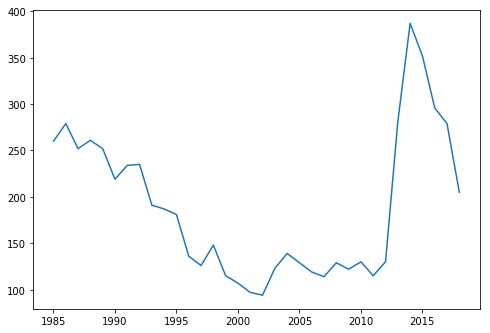

In [32]:
pp.figure(figsize = (8, 5.5))
plotname1985('F', 'Marjorie')

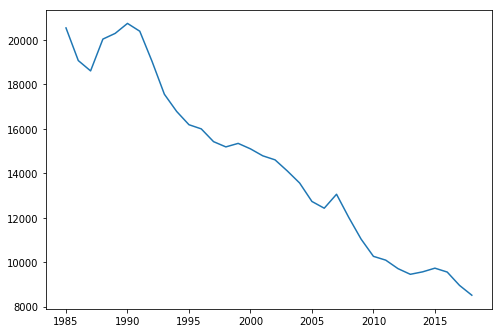

In [33]:
pp.figure(figsize = (8, 5.5))
plotname1985('F', 'Elizabeth')

In [34]:
def top20(sex, year):
    simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending =False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(20)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [35]:
def top20s(sex, year0, year1):
    years = [top20(sex, year) for year in range(year0, year1 + 1)]
    
    return years[0].join(years[1:])

In [36]:
top20s('F', 2008, 2018)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Emma,Isabella,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
2,Isabella,Emma,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
3,Emily,Olivia,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
4,Olivia,Sophia,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
5,Ava,Ava,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
6,Madison,Emily,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
7,Sophia,Madison,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
8,Abigail,Abigail,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
9,Elizabeth,Chloe,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
10,Chloe,Mia,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


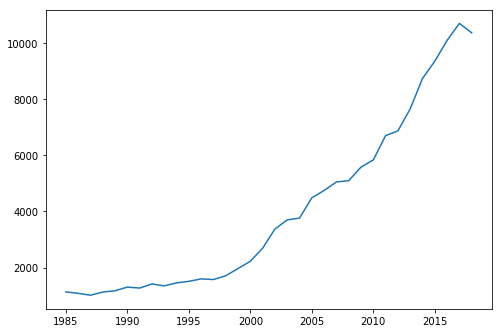

In [37]:
pp.figure(figsize = (8, 5.5))
plotname1985('F', 'Evelyn')

In [38]:
top20s('F', 1985, 2000)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica,Emily,Emily,Emily,Emily,Emily
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley,Jessica,Jessica,Hannah,Hannah,Hannah
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily,Ashley,Ashley,Samantha,Alexis,Madison
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha,Sarah,Sarah,Sarah,Sarah,Ashley
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah,Samantha,Hannah,Ashley,Samantha,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor,Taylor,Samantha,Alexis,Ashley,Alexis
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah,Hannah,Taylor,Taylor,Madison,Samantha
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany,Alexis,Alexis,Jessica,Taylor,Jessica
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda,Rachel,Elizabeth,Madison,Jessica,Elizabeth
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth,Elizabeth,Madison,Elizabeth,Elizabeth,Taylor


In [39]:
allyears_indexed['rank'] = allyears_indexed.loc['M',:,2018].sort_values('number',ascending =False).rank()

In [40]:
allyears_indexed.loc['M',:,2017]

number  rank
sex name     year              
M   Aaban    2017      11   NaN
    Aadam    2017      18   NaN
    Aadan    2017       8   NaN
    Aadarsh  2017      15   NaN
    Aaden    2017     241   NaN
    Aadesh   2017       7   NaN
    Aadhav   2017      31   NaN
    Aadhavan 2017       6   NaN
    Aadhi    2017      10   NaN
    Aadhvik  2017      13   NaN
    Aadhyan  2017       6   NaN
    Aadi     2017      46   NaN
    Aadil    2017      16   NaN
    Aadin    2017       7   NaN
    Aadish   2017       7   NaN
    Aadit    2017      46   NaN
    Aadith   2017      15   NaN
    Aaditya  2017      27   NaN
    Aadrit   2017       5   NaN
    Aadvik   2017      65   NaN
    Aadyn    2017      25   NaN
    Aagam    2017       5   NaN
    Aahaan   2017       6   NaN
    Aahan    2017      41   NaN
    Aahil    2017      65   NaN
    Aaiden   2017      74   NaN
    Aaidyn   2017       5   NaN
    Aakarsh  2017       5   NaN
    Aakash   2017      16   NaN
    Aakil    2017       9   NaN
...                   ...   ...
    Zyhier   2017       5   NaN
    Zyhir    2017      15   NaN
    Zyier    2017      16   NaN
    Zyion    2017      79   NaN
    Zyir     2017      41   NaN
    Zyire    2017      23   NaN
    Zykai    2017       5   NaN
    Zykeem   2017       5   NaN
    Zyking   2017      10   NaN
    Zylan    2017      30   NaN
    Zylas    2017       7   NaN
    Zylen    2017      24   NaN
    Zyler    2017      72   NaN
    Zylin    2017       5   NaN
    Zylis    2017       5   NaN
    Zylo     2017       6   NaN
    Zylon    2017       8   NaN
    Zymarion 2017       7   NaN
    Zymeir   2017      13   NaN
    Zymere   2017      29   NaN
    Zymier   2017      13   NaN
    Zymir    2017      70   NaN
    Zymire   2017       8   NaN
    Zyon     2017     161   NaN
    Zyonn    2017      12   NaN
    Zyree    2017      14   NaN
    Zyren    2017       9   NaN
    Zyrie    2017       5   NaN
    Zyron    2017      15   NaN
    Zyrus    2017       7   NaN

[14215 rows x 2 columns]

In [41]:
allyears['rank'] = allyears.groupby(['sex','year'])['number'].rank(ascending=0,method='dense')
allyears.head()

,name,sex,number,year,rank
0,Mary,F,7065,1880,1.0
1,Anna,F,2604,1880,2.0
2,Emma,F,2003,1880,3.0
3,Elizabeth,F,1939,1880,4.0
4,Minnie,F,1746,1880,5.0


In [42]:
allyears.tail()

,name,sex,number,year,rank
32028,Zylas,M,5,2018,912.0
32029,Zyran,M,5,2018,912.0
32030,Zyrie,M,5,2018,912.0
32031,Zyron,M,5,2018,912.0
32032,Zzyzx,M,5,2018,912.0


In [43]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()
allyears_indexed.head(20)

number   rank
sex name      year               
F   Aabha     2011       7  937.0
              2012       5  933.0
              2014       9  960.0
              2015       7  948.0
              2016       7  963.0
    Aabidah   2018       5  944.0
    Aabriella 2008       5  985.0
              2014       5  964.0
              2015       5  950.0
              2016      11  959.0
              2017       6  947.0
              2018       6  943.0
    Aada      2015       5  950.0
              2018       8  941.0
    Aadaya    2018       8  941.0
    Aaden     2009       5  958.0
    Aadhira   2012       6  932.0
              2013      10  942.0
              2014      13  956.0
              2015       8  947.0

In [44]:
allyears_indexed.tail(20)

number   rank
sex name      year               
M   Zyshonne  2002       9  809.0
              2003       7  830.0
    Zytaevius 2012       5  894.0
    Zytaveon  2011       9  876.0
              2014       8  907.0
    Zytavion  2011       5  880.0
    Zytavious 2002       6  812.0
              2004       6  851.0
              2005       5  880.0
              2006       7  878.0
              2007       6  897.0
              2009       7  888.0
              2010       6  883.0
    Zyus      2015       5  919.0
              2018       6  911.0
    Zyvion    2009       5  890.0
    Zyvon     2015       7  917.0
    Zyyon     2014       6  909.0
    Zzyzx     2010       5  884.0
              2018       5  912.0

In [45]:
allyears_indexed.loc['M','Nathan']

,number,rank
year,,
1880,114,104.0
1881,91,108.0
1882,113,107.0
1883,93,118.0
1884,100,123.0
1885,103,118.0
1886,136,105.0
1887,106,112.0
1888,129,111.0


In [46]:
allyears_indexed.loc['M','Nathan']['rank']

year
1880    104.0
1881    108.0
1882    107.0
1883    118.0
1884    123.0
1885    118.0
1886    105.0
1887    112.0
1888    111.0
1889    105.0
1890    112.0
1891    115.0
1892    111.0
1893    120.0
1894    117.0
1895    121.0
1896    135.0
1897    107.0
1898    144.0
1899    119.0
1900    117.0
1901    117.0
1902    123.0
1903    115.0
1904    131.0
1905    119.0
1906    128.0
1907    122.0
1908    126.0
1909    120.0
        ...  
1989     43.0
1990     44.0
1991     42.0
1992     44.0
1993     41.0
1994     40.0
1995     39.0
1996     37.0
1997     34.0
1998     34.0
1999     32.0
2000     30.0
2001     31.0
2002     28.0
2003     26.0
2004     20.0
2005     20.0
2006     23.0
2007     24.0
2008     21.0
2009     25.0
2010     27.0
2011     28.0
2012     29.0
2013     31.0
2014     38.0
2015     38.0
2016     43.0
2017     45.0
2018     48.0
Name: rank, Length: 139, dtype: float64

In [47]:
def plotrank(sex, name):
    data = allyears_indexed.loc[sex ,name]['rank']
    pp.plot(data.index, data.values)

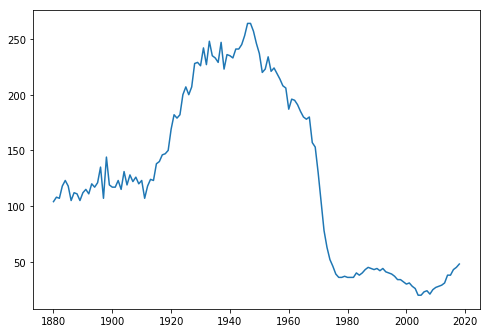

In [48]:
pp.figure(figsize = (8, 5.5))
plotrank('M', 'Nathan')

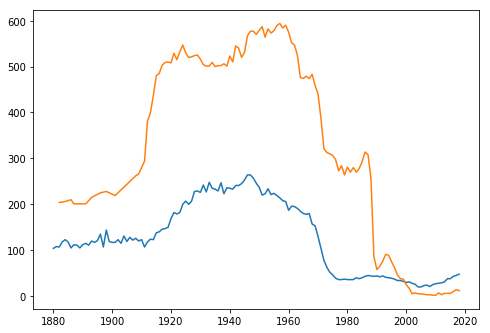

In [49]:
pp.figure(figsize = (8, 5.5))
plotrank('M', 'Nathan')
plotrank('M', 'Ethan')

In [95]:
totals = allyears.groupby(['sex', 'name'])['number'].sum()
totals.head()

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
Name: number, dtype: int64

In [96]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,114.0
Aabha,35.0,NaN
Aabid,NaN,16.0
Aabidah,5.0,NaN
Aabir,NaN,10.0


In [97]:
totals_both = totals_bysex.sum(axis = 1)
totals_both.head()

name
Aaban      114.0
Aabha       35.0
Aabid       16.0
Aabidah      5.0
Aabir       10.0
dtype: float64

In [98]:
ratio = totals_bysex ['F'] / totals_bysex ['M']
ratio.head()

name
Aaban     NaN
Aabha     NaN
Aabid     NaN
Aabidah   NaN
Aabir     NaN
dtype: float64

In [99]:
unisex = (ratio > 0.25) & (ratio < 4)

In [114]:
totals_both = totals_both[unisex]
sorted_totals_both =totals_both.sort_values(ascending=False)
sorted_totals_both.head(10)

name
Willie    595102.0
Jordan    505517.0
Taylor    430836.0
Leslie    379807.0
Jamie     353733.0
Angel     327510.0
Lee       293273.0
Jessie    277674.0
Marion    260466.0
Dana      244910.0
dtype: float64

In [115]:
unisex_names = sorted_totals_both.head(10).index.values

In [116]:
unisex_names

array(['Willie', 'Jordan', 'Taylor', 'Leslie', 'Jamie', 'Angel', 'Lee',
       'Jessie', 'Marion', 'Dana'], dtype=object)

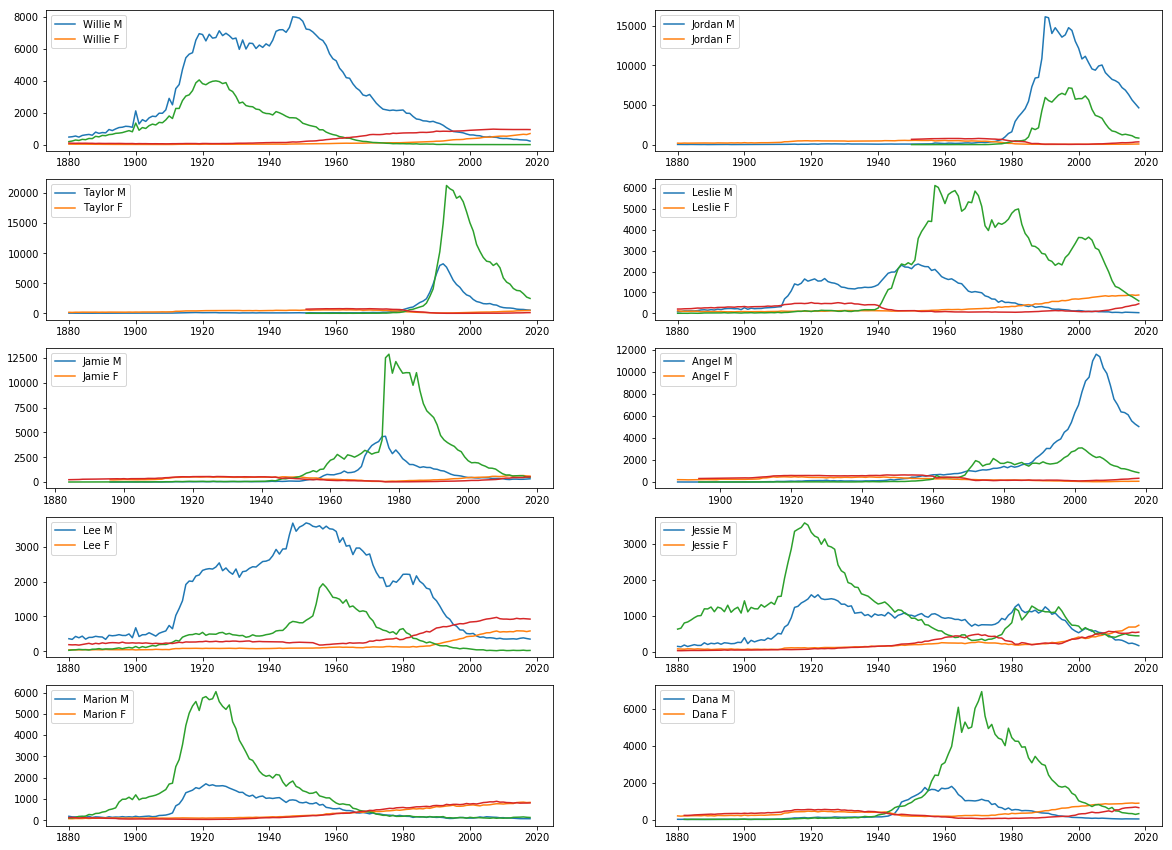

In [120]:
pp.figure(figsize = (20, 15))

for i, name in enumerate(unisex_names):
    pp.subplot(5, 2, i+1)
    
    plotname('M', name)
    plotname('F', name)
    
    pp.legend([name + ' M', name + ' F'], loc ='upper left')